# Classifications of workers
## Goal:
    Create model for predict probobilty of leaving workers
## Tasks:
    1. Preprocesing data
    2. Analis data in power bi
    3. Create model

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('aug_train.csv')

In [4]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Now we decode city to number values

In [5]:
data.city = data.city.map(lambda x: int(x.split('_')[1]))

In [6]:
data.loc[data.gender.isnull(),'gender'] = data.gender.mode()

In [7]:
data.dtypes

enrollee_id                 int64
city                        int64
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [8]:
data.relevent_experience.value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [9]:
enc_dict = {val:num for num, val in enumerate(data.relevent_experience.unique()[::-1])}
data.relevent_experience = data.relevent_experience.map(enc_dict)

In [10]:
data.relevent_experience.value_counts()

1    13792
0     5366
Name: relevent_experience, dtype: int64

In [11]:
data.loc[data.enrolled_university.isnull(),'enrolled_university'] = data.enrolled_university.mode()

In [12]:
data['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
ord_enc = OrdinalEncoder()
data['enrolled_university'] = ord_enc.fit_transform(data[['relevent_experience']])

# Now i want use onehotencoding, but i not shure in this, if model will have a bad metrcis, i'm combed to this step 

In [15]:
data =  pd.concat([data, pd.get_dummies(data['education_level'])], axis=1)

In [16]:
data.drop('education_level', axis=1, inplace=True)

In [17]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Graduate,High School,Masters,Phd,Primary School
0,8949,103,0.920,Male,1,1.0,STEM,>20,NaN,NaN,1,36,1.0,1,0,0,0,0
1,29725,40,0.776,Male,0,0.0,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0,0,0,0
2,11561,21,0.624,NaN,0,0.0,STEM,5,NaN,NaN,never,83,0.0,1,0,0,0,0
3,33241,115,0.789,NaN,0,0.0,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0,0,0,0
4,666,162,0.767,Male,1,1.0,STEM,>20,50-99,Funded Startup,4,8,0.0,0,0,1,0,0


In [18]:
null_index = data.loc[data.major_discipline.isnull(), :].index

In [19]:
data.loc[null_index, 'major_discipline'] = 'STEM'

In [20]:
data= pd.concat([data, pd.get_dummies(data.major_discipline)], axis=1)
data.drop('major_discipline', axis=1, inplace=True)

In [21]:
pd.options.display.max_columns = 1000

In [22]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,experience,company_size,company_type,last_new_job,training_hours,target,Graduate,High School,Masters,Phd,Primary School,Arts,Business Degree,Humanities,No Major,Other,STEM
0,8949,103,0.920,Male,1,1.0,>20,NaN,NaN,1,36,1.0,1,0,0,0,0,0,0,0,0,0,1
1,29725,40,0.776,Male,0,0.0,15,50-99,Pvt Ltd,>4,47,0.0,1,0,0,0,0,0,0,0,0,0,1
2,11561,21,0.624,NaN,0,0.0,5,NaN,NaN,never,83,0.0,1,0,0,0,0,0,0,0,0,0,1
3,33241,115,0.789,NaN,0,0.0,<1,NaN,Pvt Ltd,never,52,1.0,1,0,0,0,0,0,1,0,0,0,0
4,666,162,0.767,Male,1,1.0,>20,50-99,Funded Startup,4,8,0.0,0,0,1,0,0,0,0,0,0,0,1


In [23]:
data.experience.value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [24]:
data.loc[data.experience=='<1', 'experience']=0
data.loc[data.experience=='>20', 'experience']=21

In [25]:
data.loc[data.experience.isnull(), 'experience'] = 9

In [26]:
data.experience = data.experience.astype(int)

In [27]:
data.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [28]:
data.company_size.mode()

0    50-99
dtype: object

In [29]:
data.company_size.isnull().sum()

5938

In [30]:
data.loc[data.company_size.isnull(), 'company_size'] = '50-99' 

In [31]:
enc_dict = {val:num for num, val in enumerate(data.company_size.unique())}
data.company_size = data.company_size.map(enc_dict)

In [32]:
data.loc[data.company_type.isnull(), 'company_type'] = 'Pvt Ltd'
enc_dict = {val:num for num, val in enumerate(data.company_type.unique())}
data.company_type = data.company_type.map(enc_dict)

In [33]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,experience,company_size,company_type,last_new_job,training_hours,target,Graduate,High School,Masters,Phd,Primary School,Arts,Business Degree,Humanities,No Major,Other,STEM
0,8949,103,0.920,Male,1,1.0,21,0,0,1,36,1.0,1,0,0,0,0,0,0,0,0,0,1
1,29725,40,0.776,Male,0,0.0,15,0,0,>4,47,0.0,1,0,0,0,0,0,0,0,0,0,1
2,11561,21,0.624,NaN,0,0.0,5,0,0,never,83,0.0,1,0,0,0,0,0,0,0,0,0,1
3,33241,115,0.789,NaN,0,0.0,0,0,0,never,52,1.0,1,0,0,0,0,0,1,0,0,0,0
4,666,162,0.767,Male,1,1.0,21,0,1,4,8,0.0,0,0,1,0,0,0,0,0,0,0,1


In [34]:
data.last_new_job.value_counts()
data.loc[data.last_new_job =='>4', 'last_new_job'] = 5
data.loc[data.last_new_job =='never', 'last_new_job'] =0

In [35]:
data.loc[data.last_new_job.isnull(), 'last_new_job'] = data.last_new_job.median()

In [36]:
data.loc[~data.gender.isnull(), 'gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [37]:
enc_dict = {val:num for num, val in enumerate(data.loc[~data.gender.isnull(), 'gender'].unique())}
data.gender= data.gender.map(enc_dict)

In [38]:
train = data.loc[~data.gender.isnull(), :]
pred = data.loc[data.gender.isnull(), :]

In [39]:
pred.shape

(4508, 23)

In [40]:
y_train = train.gender
X_train = train.drop('gender', axis=1)
X_fpred = pred.drop('gender', axis=1)

In [41]:
X_fpred.shape

(4508, 22)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [43]:
X_fpred.shape

(4508, 22)

In [44]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_fpred = std.transform(X_fpred)

In [45]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [46]:
gender_pred = log_reg.predict(X_fpred)

In [47]:
gender_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
data.loc[data.gender.isnull(), 'gender'] =gender_pred

In [49]:
data.last_new_job=data.last_new_job.astype(int)

In [50]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
Graduate                  0
High School               0
Masters                   0
Phd                       0
Primary School            0
Arts                      0
Business Degree           0
Humanities                0
No Major                  0
Other                     0
STEM                      0
dtype: int64

## Okay. I finished prepare data, now i will try create a predicted model
Now i will crete RF for test 

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [52]:
def split_data(data):
    X = data.drop('target', axis=1)
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size = 0.2)
    return {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

In [53]:
D_M = split_data(data)

In [54]:
rand_forest = RandomForestClassifier()

In [55]:
rand_forest.fit(D_M['X_train'],D_M[ 'y_train'])

RandomForestClassifier()

I will check quality of model using presizyon and recall metrics 

In [56]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [57]:
metrics = [precision_score, recall_score,accuracy_score]

In [58]:
print(precision_score.__name__)

precision_score


In [59]:
pred = rand_forest.predict(D_M['X_test'])
for metr in metrics:
    print(f"{metr.__name__} {metr(D_M['y_test'], pred)}")

precision_score 0.5793918918918919
recall_score 0.35916230366492147
accuracy_score 0.7753131524008351


Result of metris so low, come back to step of prepare data

I think, in data a lot of parametrs have a zero value, now i check this

In [60]:
data["Graduate"].value_counts()[1]

11598

In [61]:
data.shape

(19158, 23)

In [62]:
for col in data.loc[:,'Graduate':].columns:
    one = data[col].value_counts()[1]
    print(f"{col} {one/data.shape[0]}")

Graduate 0.6053867835891011
High School 0.10528238855830463
Masters 0.22763336465184258
Phd 0.021609771374882555
Primary School 0.01607683474266625
Arts 0.013205971395761561
Business Degree 0.017068587535233323
Humanities 0.034920137801440654
No Major 0.01164004593381355
Other 0.019887253366739743
STEM 0.9032780039670112


I drop features, where quantity of one less than 20%

In [63]:
# for col in data.loc[:,'Graduate':].columns:
#     one = data[col].value_counts()[1]
#     if one/data.shape[0]<0.2:
#         data.drop(col, axis=1, inplace=True)

In [65]:
# qqweqe
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,experience,company_size,company_type,last_new_job,training_hours,target,Graduate,High School,Masters,Phd,Primary School,Arts,Business Degree,Humanities,No Major,Other,STEM
0,8949,103,0.920,0.0,1,1.0,21,0,0,1,36,1.0,1,0,0,0,0,0,0,0,0,0,1
1,29725,40,0.776,0.0,0,0.0,15,0,0,5,47,0.0,1,0,0,0,0,0,0,0,0,0,1
2,11561,21,0.624,0.0,0,0.0,5,0,0,0,83,0.0,1,0,0,0,0,0,0,0,0,0,1
3,33241,115,0.789,0.0,0,0.0,0,0,0,0,52,1.0,1,0,0,0,0,0,1,0,0,0,0
4,666,162,0.767,0.0,1,1.0,21,0,1,4,8,0.0,0,0,1,0,0,0,0,0,0,0,1


In [66]:
data.drop(columns=['enrollee_id','city'], inplace=True)

Now i will try again fit model

In [68]:
New_data = split_data(data)

In [69]:
New_forest = RandomForestClassifier(class_weight={1:0.75, 0:0.25})
New_forest.fit(New_data['X_train'], New_data['y_train'])

RandomForestClassifier(class_weight={0: 0.25, 1: 0.75})

In [70]:
data.target.value_counts()[0]/data.shape[0], data.target.value_counts()[1]/data.shape[0]

(0.7506524689424784, 0.24934753105752167)

In [71]:
New_forest.score(y=New_data['y_test'], X=New_data['X_test'])

0.7583507306889353

In [72]:
from xgboost import XGBClassifier

In [73]:
log_reg = LogisticRegression()
log_reg.fit(New_data['X_train'], New_data['y_train'])

D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
xgb = XGBClassifier()
xgb.fit(New_data['X_train'], New_data['y_train']);

D:\anaconda\envs\Dip_porject\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [75]:
new_pred = xgb.predict(New_data['X_test'])
for metr in metrics:
    print(f"{metr.__name__} {metr(New_data['y_test'], new_pred)}")

precision_score 0.5459770114942529
recall_score 0.39790575916230364
accuracy_score 0.7674843423799582


Now i will lookin for hipper parametrs

In [76]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [77]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [78]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [80]:
X = data.drop('target', axis=1)
y = data.target

In [81]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, 
scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001)

In [83]:

from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(
# estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.6, gamma=5, gpu_id=-1,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.02, max_delta_step=0, max_depth=5,
#               min_child_weight=5, missing=None, monotone_constraints='()',
#               n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
#               random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
#               silent=True, subsample=1.0, tree_method='exact',
#               validate_parameters=1, verbosity=None) ,
# X = data.drop('target', axis=1),
# y = data.target, train_sizes =np.linspace(.1, 1.0, 5), cv = 5,
# scoring = 'roc_auc')


In [84]:
import matplotlib.pyplot as plt

In [85]:
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,  RandomForestClassifier

In [86]:
def learne_curve(model, score, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
    estimator = model,
    X = X,
    y = y, train_sizes =np.linspace(.1, 1.0, 5), cv = 5,
    scoring = score)
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = test_scores.mean(axis = 1)
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel(score, fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(f"{model.__class__}", fontsize = 18, y = 1.03)
    plt.legend()
    return plt

In [87]:
models = [LogisticRegression(), XGBClassifier(), RandomForestClassifier(), SVC(), ExtraTreeClassifier(),
GradientBoostingClassifier()]

In [88]:
for mod in models:
    mod.fit(New_data['X_train'], New_data['y_train']);
    pred = mod.predict(New_data['X_test'])
    print(f"{accuracy_score(New_data['y_test'], pred)} {mod.__str__}")

D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\envs\Dip_porject\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7682672233820459 <method-wrapper '__str__' of LogisticRegression object at 0x0000029B95874700>
[22:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7674843423799582 <method-wrapper '__str__' of XGBClassifier object at 0x0000029B95874730>
0.759133611691023 <method-wrapper '__str__' of RandomForestClassifier object at 0x0000029B958744F0>
0.7507828810020877 <method-wrapper '__str__' of SVC object at 0x0000029B95874820>
0.7014613778705637 <method-wrapper '__str__' of ExtraTreeClassifier object at 0x0000029B95874850>
0.7794885177453027 <method-wrapper '__str__' of GradientBoostingClassifier object at 0x0000029B95874790>


In [89]:
precision_score

<function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

<module 'matplotlib.pyplot' from 'D:\\anaconda\\envs\\Dip_porject\\lib\\site-packages\\matplotlib\\pyplot.py'>

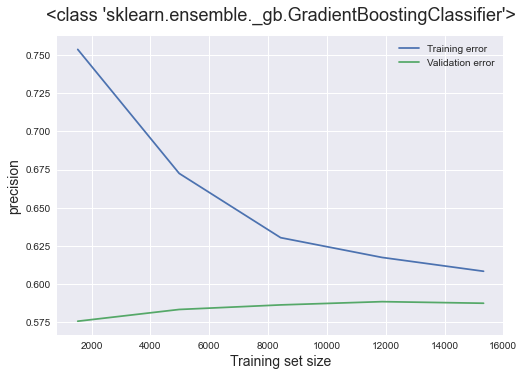

In [91]:
learne_curve(GradientBoostingClassifier(), 'precision', X=X, y=y)

In [92]:
from sklearn.metrics import plot_confusion_matrix

In [93]:
model = models[-1]

In [ ]:
pred = model.predict(New_data['X_test'])

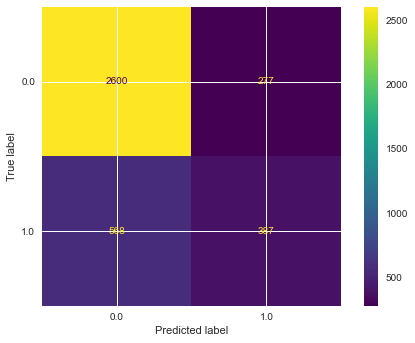

In [94]:
plot_confusion_matrix(model, New_data['X_test'], New_data['y_test'])

In [95]:
grad_boost = GradientBoostingClassifier()

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, shuffle=True,random_state=12)

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8, 10, 20, 30],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    }

In [108]:
clf= RandomizedSearchCV(GradientBoostingClassifier(), 
parameters, cv=10, n_jobs=-1, scoring='precision')

In [109]:
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.025, 0.05,
                                                          0.075, 0.1, 0.15,
                                                          0.2],
                                        'max_depth': [3, 5, 8, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                                        'min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                                        'subsample': [0.5, 0.618, 0.8, 0.85,
                        

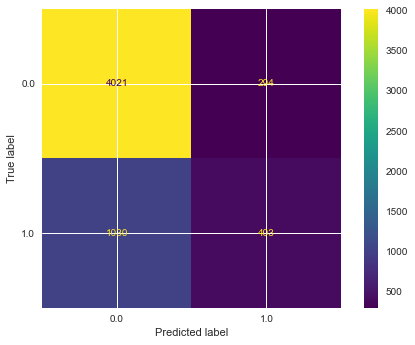

In [110]:
plot_confusion_matrix(clf, X_test, y_test)

In [116]:
pred = models[-1].predict(X_test)

In [115]:
clf.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=8, max_features='sqrt',
                           min_samples_leaf=0.13636363636363638,
                           min_samples_split=0.13636363636363638,
                           subsample=0.8)

In [118]:
rand_forest = RandomForestClassifier()

In [123]:
for weight in np.linspace(0,1, 20):
    cl_weight = {0:1-weight, 1:weight}
    forest = LogisticRegression(class_weight=cl_weight)
    forest.fit(X_train, y_train)
    pred= forest.predict(X_test)
    print(f"{weight}-> {precision_score(y_test, pred)}")


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0-> 0.0


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.05263157894736842-> 0.0


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.10526315789473684-> 0.0


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.15789473684210525-> 0.0


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.21052631578947367-> 0.0


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.2631578947368421-> 0.7


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3157894736842105-> 0.5909090909090909


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3684210526315789-> 0.5733333333333334


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.42105263157894735-> 0.5714285714285714


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.47368421052631576-> 0.58311345646438


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5263157894736842-> 0.5509868421052632


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5789473684210527-> 0.5252960172228203


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.631578947368421-> 0.5051903114186851


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6842105263157894-> 0.47607209446861404


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7368421052631579-> 0.3991616208663251


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7894736842105263-> 0.3759942154736081


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8421052631578947-> 0.3


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.894736842105263-> 0.26519444987297247
0.9473684210526315-> 0.25119236883942764
1.0-> 0.24930410577592205


D:\anaconda\envs\Dip_porject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
log_reg = LogisticRegression(class_weight={0:0.2631578947368421, 1:1-0.2631578947368421})

In [136]:
log_reg.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2631578947368421,
                                     1: 0.736842105263158})

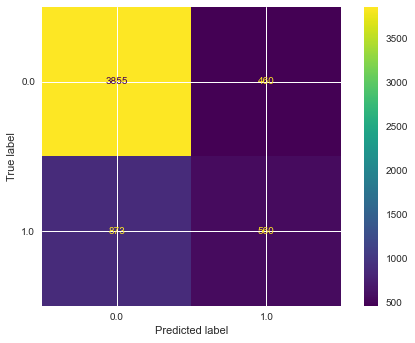

In [138]:
plot_confusion_matrix(log_reg, X_test, y_test)

In [139]:
precision_score(log_reg.predict(X_test), y_test)

0.39078855547801816

In [134]:
log_reg.predict_proba(X_test)

array([[0.66158308, 0.33841692],
       [0.43847074, 0.56152926],
       [0.83804346, 0.16195654],
       ...,
       [0.56245833, 0.43754167],
       [0.47522532, 0.52477468],
       [0.45904767, 0.54095233]])

In [133]:
accuracy_score(log_reg.predict(X_test), y_test)

0.6743215031315241

In [117]:
precision_score(y_test, pred)

0.5912067352666043